# Actividad 6
____________________

- Jose Israel Perez Ontiveros | A01423294
- Maximiliano Romero Budib | 
- Ruben Vazquez


## Descripcion

añadir

## 1. Importar librerias

In [40]:
#Instalamos la librería para análisis de variables categóricas
%pip install funpymodeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

Note: you may need to restart the kernel to use updated packages.


## 2. Cargar Archivo

In [41]:
data = pd.read_csv("./Recursos/TrainingDataComplete.csv", index_col=0)
display(data)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0


## 3. Preprocesamiento (Nulos y Outliers)

- 3.1 Verificamos info del DF

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [43]:
# Separamos columnas cuantitativas y cualitativas
dataCualitativas  = data.iloc[: , [3, 4, 5, 6, 7, 8, 11]]
dataCuantitativas = data.iloc[: , [0, 1, 2, 9, 10]]

print(f'Columnas cualitativas: {dataCualitativas.columns}')
print(f'\n\nColumnas cuantitativas: {dataCuantitativas.columns}')

Columnas cualitativas: Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE', 'Risk_Flag'],
      dtype='object')


Columnas cuantitativas: Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'], dtype='object')


In [44]:
# Verificamos que no hayan valores nulos
valores_nulos = dataCuantitativas.isnull().sum()
print(valores_nulos)

Income               0
Age                  0
Experience           0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64


Al no encontrar valores nulos podemos avanzar a la identificación de outliers

- 3.2 Diagrama de bigote

<Figure size 1500x800 with 0 Axes>

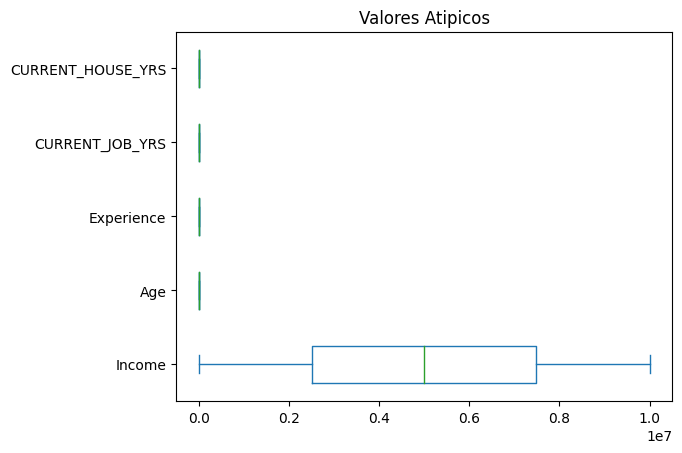

In [45]:
fig = plt.figure(figsize = (15, 8))
dataCuantitativas.plot(kind='box', vert=False)
plt.title('Valores Atipicos')
plt.show()

- 3.3 Metodo de cuantiles

In [46]:
# Encontramos los valores extremos
y = dataCuantitativas

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25

limiteSuperiorIQR = percentile75 + 1.5 * iqr
limiteInferiorIQR = percentile25 - 1.5 * iqr


print(f"Limite superior permitido :")
for col, val in limiteSuperiorIQR.items():
    print(f"{col}: {round(val, 2)}")

print(f"\n\nLimite inferior permitido :")
for col, val in limiteInferiorIQR.items():
    print(f"{col}: {round(val, 2)}")

Limite superior permitido :
Income: 14939232.5
Age: 110.0
Experience: 30.0
CURRENT_JOB_YRS: 18.0
CURRENT_HOUSE_YRS: 16.0


Limite inferior permitido :
Income: -4958715.5
Age: -10.0
Experience: -10.0
CURRENT_JOB_YRS: -6.0
CURRENT_HOUSE_YRS: 8.0


In [47]:
# Encontramos Outliers
outliers = dataCuantitativas[(y>limiteSuperiorIQR) | (y<limiteInferiorIQR)]
print(f"\nOutliers:\n")
for col, val in outliers.items():
    print(f"{col}: {round(val, 2)}")


Outliers:

Income: Id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
          ..
251996   NaN
251997   NaN
251998   NaN
251999   NaN
252000   NaN
Name: Income, Length: 252000, dtype: float64
Age: Id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
          ..
251996   NaN
251997   NaN
251998   NaN
251999   NaN
252000   NaN
Name: Age, Length: 252000, dtype: float64
Experience: Id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
          ..
251996   NaN
251997   NaN
251998   NaN
251999   NaN
252000   NaN
Name: Experience, Length: 252000, dtype: float64
CURRENT_JOB_YRS: Id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
          ..
251996   NaN
251997   NaN
251998   NaN
251999   NaN
252000   NaN
Name: CURRENT_JOB_YRS, Length: 252000, dtype: float64
CURRENT_HOUSE_YRS: Id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
          ..
251996   NaN
251997   NaN
251998   NaN
251999   NaN
252000   NaN
Name: C

- 3.4 Convertir outliers en nulos

In [48]:
dataIqr = dataCuantitativas[(y<=limiteSuperiorIQR) & (y>=limiteInferiorIQR)]
display(dataIqr)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Id,,,,,
1,1303834,23,3,3,13
2,7574516,40,10,9,13
3,3991815,66,4,4,10
4,6256451,41,2,2,12
5,5768871,47,11,3,14
...,...,...,...,...,...
251996,8154883,43,13,6,11
251997,2843572,26,10,6,11
251998,4522448,46,7,7,12


In [49]:
# Corroboramos valores nulos
valores_nulos = dataIqr.isnull().sum()
print(valores_nulos)

Income               0
Age                  0
Experience           0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64


No se encontraron valores nulos, por tanto no hay atipicos

- 3.5 Unimos las columnas cuantitativas con las cualitativas

In [50]:
dataClean = pd.concat([dataCualitativas, dataIqr], axis=1)
display(dataClean)

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,Risk_Flag,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Id,,,,,,,,,,,,
1,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,0,1303834,23,3,3,13
2,single,rented,no,Software_Developer,Parbhani,Maharashtra,0,7574516,40,10,9,13
3,married,rented,no,Technical_writer,Alappuzha,Kerala,0,3991815,66,4,4,10
4,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,1,6256451,41,2,2,12
5,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,1,5768871,47,11,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,single,rented,no,Surgeon,Kolkata,West_Bengal,0,8154883,43,13,6,11
251997,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,0,2843572,26,10,6,11
251998,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,0,4522448,46,7,7,12


## 4. Extraccion de caracteristicas

- 4.1 Columna Age

,Age,frequency,percentage,cumulative_perc
0,27,5197,0.020623,0.020623
1,66,5092,0.020206,0.040829
2,48,4967,0.01971,0.06054
3,33,4921,0.019528,0.080067
4,41,4827,0.019155,0.099222
5,45,4806,0.019071,0.118294
6,54,4785,0.018988,0.137282
7,68,4772,0.018937,0.156218
8,35,4643,0.018425,0.174643
9,50,4624,0.018349,0.192992


<Axes: ylabel='frequency'>

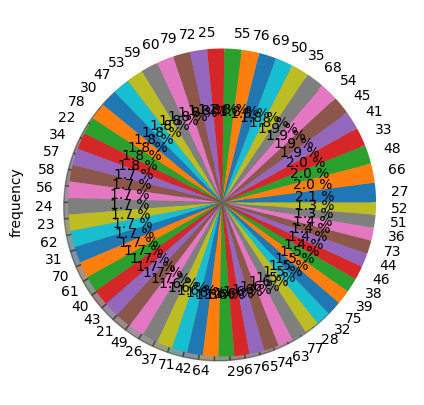

In [51]:
table = freq_tbl(dataClean['Age'].astype("string"))
display(table)
Filtro = table[table['frequency'] > 20]
Filtro_setter = Filtro.set_index("Age")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")


- 4.2 Columna Experience

,Experience,frequency,percentage,cumulative_perc
0,6,13158,0.052214,0.052214
1,9,12936,0.051333,0.103548
2,12,12800,0.050794,0.154341
3,18,12601,0.050004,0.204345
4,10,12503,0.049615,0.25396
5,5,12441,0.049369,0.303329
6,14,12369,0.049083,0.352413
7,19,12287,0.048758,0.401171
8,17,12131,0.048139,0.44931
9,16,12106,0.04804,0.497349


<Axes: ylabel='frequency'>

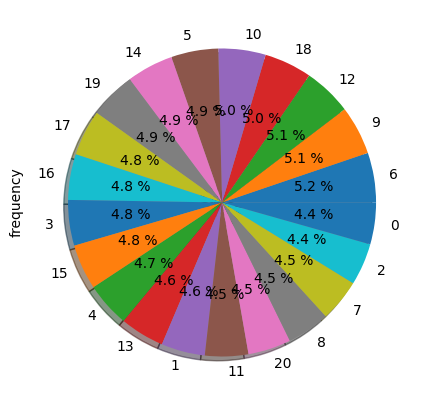

In [52]:
table = freq_tbl(dataClean['Experience'].astype("string"))
display(table)
Filtro = table[table['frequency'] > 20]
Filtro_setter = Filtro.set_index("Experience")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")


- 4.3 Columna Married/Single

,Married/Single,frequency,percentage,cumulative_perc
0,single,226272,0.897905,0.897905
1,married,25728,0.102095,1.000000


<Axes: ylabel='frequency'>

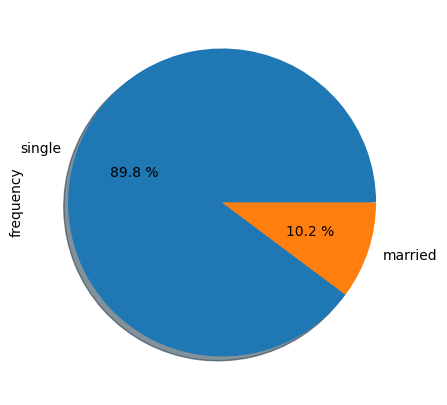

In [53]:
table = freq_tbl(dataClean['Married/Single'])
display(table)
Filtro = table[table['frequency'] > 20]
Filtro_setter = Filtro.set_index("Married/Single")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.4 Columna House_Ownership

,House_Ownership,frequency,percentage,cumulative_perc
0,rented,231898,0.920230,0.920230
1,owned,12918,0.051262,0.971492
2,norent_noown,7184,0.028508,1.000000


<Axes: ylabel='frequency'>

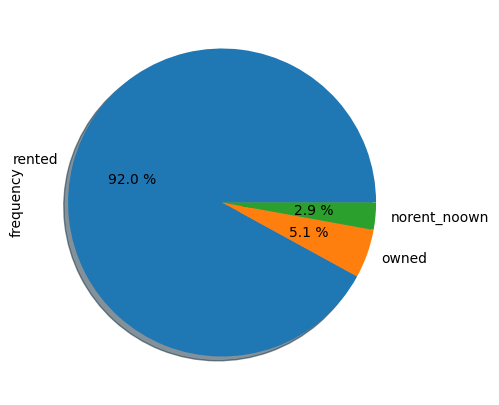

In [54]:
table = freq_tbl(dataClean['House_Ownership'])
display(table)
Filtro = table[table['frequency'] > 20]
Filtro_setter = Filtro.set_index("House_Ownership")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.5 Columna Profession

,Profession,frequency,percentage,cumulative_perc
0,Physician,5957,0.023639,0.023639
1,Statistician,5806,0.023040,0.046679
2,Web_designer,5397,0.021417,0.068095
3,Psychologist,5390,0.021389,0.089484
4,Computer_hardware_engineer,5372,0.021317,0.110802
5,Drafter,5359,0.021266,0.132067
6,Magistrate,5357,0.021258,0.153325
7,Fashion_Designer,5304,0.021048,0.174373
8,Air_traffic_controller,5281,0.020956,0.195329
9,Comedian,5259,0.020869,0.216198


<Axes: ylabel='frequency'>

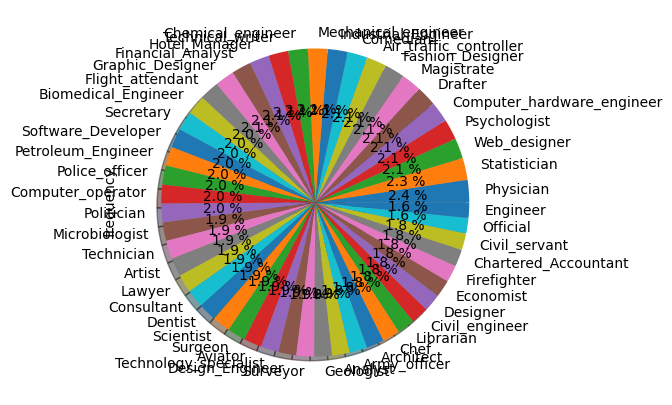

In [55]:
table = freq_tbl(dataClean['Profession'])
display(table)
Filtro = table[table['frequency'] > 5]
Filtro_setter = Filtro.set_index("Profession")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.6 Columna CITY

,CITY,frequency,percentage,cumulative_perc
0,Vijayanagaram,1259,0.004996,0.004996
1,Bhopal,1208,0.004794,0.009790
2,Bulandshahr,1185,0.004702,0.014492
3,Saharsa[29],1180,0.004683,0.019175
4,Vijayawada,1172,0.004651,0.023825
...,...,...,...,...
312,Ujjain,486,0.001929,0.992877
313,Warangal[11][12],459,0.001821,0.994698
314,Bettiah[33],457,0.001813,0.996512
315,Katni,448,0.001778,0.998290


<Axes: ylabel='frequency'>

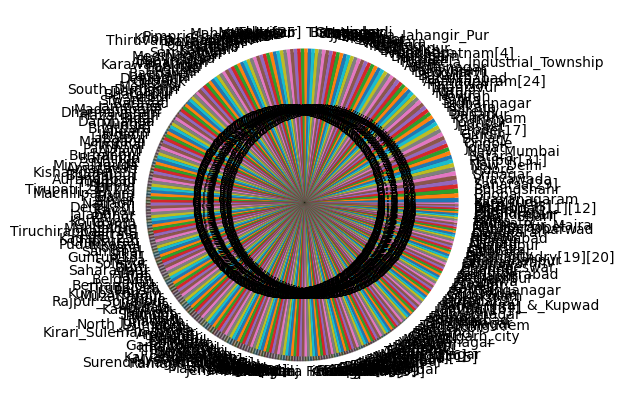

In [56]:
table = freq_tbl(dataClean['CITY'])
display(table)
Filtro = table[table['frequency'] > 50]
Filtro_setter = Filtro.set_index("CITY")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.7 Columna CURRENT_JOB_YRS

,CURRENT_JOB_YRS,frequency,percentage,cumulative_perc
0,3,29460,0.116905,0.116905
1,4,28339,0.112456,0.229361
2,5,25091,0.099567,0.328929
3,6,23491,0.093218,0.422147
4,7,19925,0.079067,0.501214
5,8,18874,0.074897,0.576111
6,9,17132,0.067984,0.644095
7,10,15768,0.062571,0.706667
8,11,13595,0.053948,0.760615
9,1,11575,0.045933,0.806548


<Axes: ylabel='frequency'>

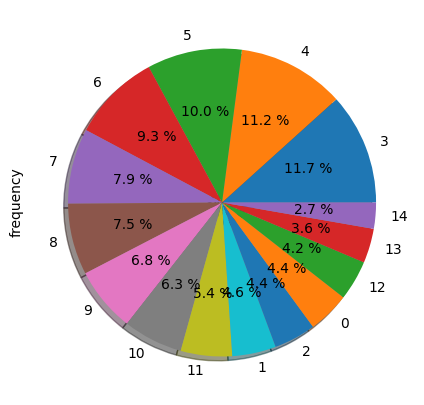

In [57]:
table = freq_tbl(dataClean['CURRENT_JOB_YRS'].astype("string"))
display(table)
Filtro = table[table['frequency'] > 20]
Filtro_setter = Filtro.set_index("CURRENT_JOB_YRS")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")


- 4.8 Columna CURRENT_HOUSE_YRS

,CURRENT_HOUSE_YRS,frequency,percentage,cumulative_perc
0,11,51873,0.205845,0.205845
1,12,51791,0.20552,0.411365
2,13,50659,0.201028,0.612393
3,14,49003,0.194456,0.806849
4,10,48674,0.193151,1.0


<Axes: ylabel='frequency'>

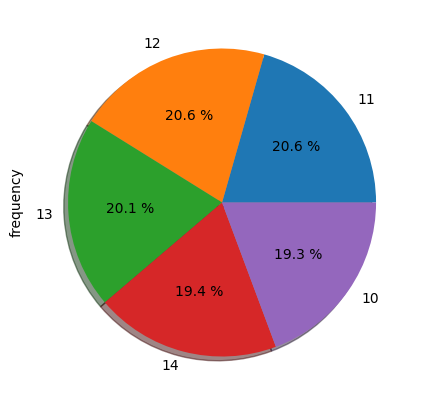

In [58]:
table = freq_tbl(dataClean['CURRENT_HOUSE_YRS'].astype("string"))
display(table)
Filtro = table[table['frequency'] > 20]
Filtro_setter = Filtro.set_index("CURRENT_HOUSE_YRS")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")


- 4.9 Columna Risk_Flag

,Risk_Flag,frequency,percentage,cumulative_perc
0,0,221004,0.877,0.877
1,1,30996,0.123,1.0


<Axes: ylabel='frequency'>

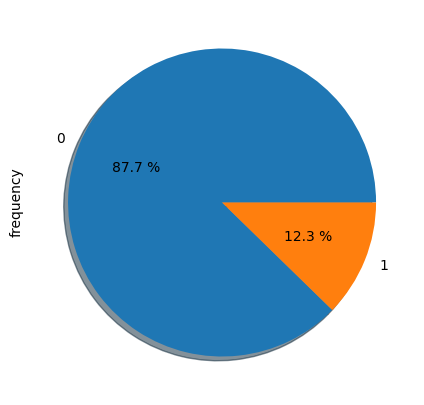

In [59]:
table = freq_tbl(dataClean['Risk_Flag'].astype("string"))
display(table)
Filtro = table[table['frequency'] > 20]
Filtro_setter = Filtro.set_index("Risk_Flag")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")
